# Deep Learning with `Flux.jl`
---

The purpose of this notebook is to showcase one of the most popular deep learning framework in Julia: `Flux.jl`. 
   
   
*References for this notebook:*
*  Flux Neural Network tutorial: [Deep Learning with Julia](https://medium.com/coffee-in-a-klein-bottle/deep-learning-with-julia-e7f15ad5080b)(DSB)
*  Flux Neural Network example: [Deep learning on "the iris data-set" in Julia](https://dev.to/bionboy/deep-learning-on-the-iris-data-set-in-julia-3pbe)(Luke Floden)

## Outline of this notebook


- Calling python built-in function 
- Calling python hand-written function 
- Importing python libraries
- Calling R built-in function
- Calling R hand-written function

## Libraries

In [16]:
# Packages
using Plots
using Statistics, Random
using Flux
using RDatasets

In [2]:
# External source
include("notebookFormatting.jl");

## Load data set

We will use the "Iris" data set that contains 150 samples iris flower. This data set was originally introduced by the British statistician and biologist Ronald Fisher in his 1936. The variables in each sample are defined as:
* length of the iris petal in centimeter
* length of the iris sepal in centimeter
* width of the iris petal in centimeter
* width of the iris sepal in centimeter
* species of iris (*Setosa, Virginica, Versicolor*)   

![](images/iris-278x300.png)   

Iris features illustrated    

credits to https://gallery.azure.ai/Experiment/Classify-Iris-Dataset-using-Decision-Forest-1

In [2]:
# Load Data
iris = dataset("datasets", "iris");

In [3]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

In [10]:
dfSpecies = groupby(iris, :Species);
dfSpecies

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


### Visualizations

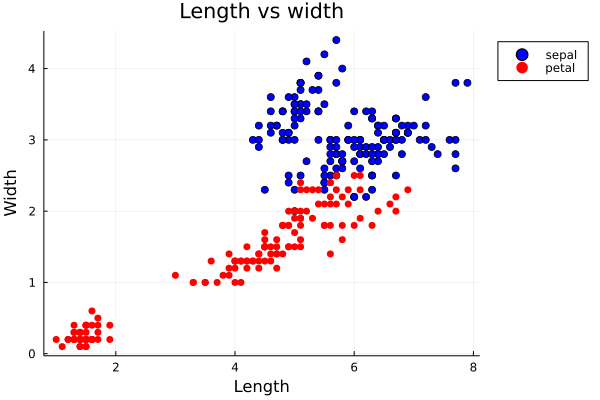

In [13]:
scatter(title="Length vs width", xlabel = "Length", ylabel="Width",
        iris.SepalLength, iris.SepalWidth,  color="blue", label="sepal")
scatter!(iris.PetalLength, iris.PetalWidth, color="red", label="petal", 
         legend = :outertopright, markerstrokewidth = 0)

In [14]:
# Convert df to array
data = convert(Array, iris)

150×5 Matrix{Any}:
 5.1  3.5  …  CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.9  3.0     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.7  3.2     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.6  3.1     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 5.0  3.6     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 5.4  3.9  …  CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.6  3.4     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 5.0  3.4     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.4  2.9     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.9  3.1     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 5.4  3.7  …  CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.8  3.4     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 4.8  3.0     CategoricalArrays.CategoricalValue{String, UInt8} "setosa"
 ⋮         ⋱  
 6.0  3.0     Cat

In [18]:
Random.seed!(123);    
# Shuffle
data = data[shuffle(1:end), :];

In [21]:
# train/test split
train_test_ratio = .7
idx = Int(floor(size(iris, 1) * train_test_ratio))
data_train = data[1:idx,:]
data_test = data[idx+1:end, :];

In [22]:
# Get feature vectors
get_feat(d) = transpose(convert(Array{Float32},d[:, 1:end-1]))
x_train = get_feat(data_train)
x_test = get_feat(data_test)

4×45 transpose(::Matrix{Float32}) with eltype Float32:
 5.7  5.1  5.3  4.7  5.0  6.1  6.5  6.0  …  6.2  7.3  6.3  5.7  7.6  6.7  5.6
 2.5  2.5  3.7  3.2  2.0  3.0  3.0  2.7     2.8  2.9  2.3  2.9  3.0  3.1  2.5
 5.0  3.0  1.5  1.6  3.5  4.9  5.5  5.1     4.8  6.3  4.4  4.2  6.6  4.4  3.9
 2.0  1.1  0.2  0.2  1.0  1.8  1.8  1.6     1.8  1.8  1.3  1.3  2.1  1.4  1.1

In [25]:
# One hot labels
#   onehot(d) = [Flux.onehot(v, unique(df.class)) for v in d[:,end]]
onehot(d) = Flux.onehotbatch(d[:,end], unique(iris.Species))
y_train = onehot(data_train)
y_test = onehot(data_test)

3×45 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  1  ⋅  ⋅  1  1  ⋅  ⋅  1  ⋅     ⋅  ⋅  1  1  ⋅  ⋅  ⋅  1  1  ⋅  1  1
 1  ⋅  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  1  1  ⋅  1     1  1  ⋅  ⋅  ⋅  1  1  ⋅  ⋅  1  ⋅  ⋅

## Creating the Neural Network

In [27]:
function NeuralNetwork()
    return Chain(
            # layer 1: 4 inputs, 8 outputs, 
            #          activation function: relu(Rectified Linear Unit function f(x) = max(0, x))
            Dense(4, 8,relu),
            # layer 2: 8 inputs, 3 outputs, 
            #          activation function: soft max
            Dense(8,3,softmax)
            )
end

NeuralNetwork (generic function with 1 method)

## Train model

In [9]:
# Create batches by generating an object that iterates over mini-batches of data, 
# each mini-batch containing batchsize observations 
# (except possibly the last one).
data = Flux.Data.DataLoader((X, Y'), batchsize=100,shuffle=true);

In [26]:
batch_size= 1
train_dl = Flux.Data.DataLoader((x_train, y_train), batchsize=batch_size, shuffle=true)
test_dl = Flux.Data.DataLoader((x_test, y_test), batchsize=batch_size)

Flux.Data.DataLoader{Tuple{LinearAlgebra.Transpose{Float32, Matrix{Float32}}, Flux.OneHotArray{UInt32, 3, 1, 2, Vector{UInt32}}}, Random._GLOBAL_RNG}((Float32[5.7 5.1 … 6.7 5.6; 2.5 2.5 … 3.1 2.5; 5.0 3.0 … 4.4 3.9; 2.0 1.1 … 1.4 1.1], Bool[0 0 … 0 0; 0 1 … 1 1; 1 0 … 0 0]), 1, 45, true, 45, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  36, 37, 38, 39, 40, 41, 42, 43, 44, 45], false, Random._GLOBAL_RNG())

In [10]:
# Define our model
m = NeuralNetwork()
# Define optimization algorithm
# Gradient descent with a learning η = 0.05
lr = 0.01
opt  = ADAM(lr, (0.9, 0.999))
# Define loss function
loss(x, y) = Flux.Losses.logitbinarycrossentropy(model(x), y) # m(x), predicted values;

### Training Method 1

Declare what parameters are going to be trained:

In [11]:
# we can select what specific layers need to be trained, useful for transfer learning.
ps = Flux.params(m);

Define how many epochs will be used:    

In [12]:
# hyperparameter that defines the number of times that a learning algorithm will handle the entire training data set.
numEpochs = 30;

Training:

In [13]:
for i in 1:numEpochs
    Flux.train!(loss, ps, data, opt)
end

In [19]:
outputModel = [mean(m(real)) mean(m(fake))]
println(round.(outputModel; digits = 4)) # Print model prediction

[0.8097 0.1848]


### Training Method 2

In [20]:
m2    = NeuralNetwork()
epochs = 20
loss2(x, y) = sum(Flux.Losses.binarycrossentropy(m2(x), y)) # m(x), predicted values
for epoch = 1:epochs
    for batch in data
        # compute gradient according to parameters values and 
        # apply results to the loss function for the batch d
        gs = Flux.gradient(Flux.params(m2)) do
            l = loss2(batch...)
        end
        # update the new parameters values according the gradients from 
        # the last iteration.
        Flux.Optimise.update!(opt, Flux.params(m2), gs)
    end
end

outputModel = [mean(m2(real)) mean(m2(fake))]
println(round.(outputModel; digits = 4)) # Print model prediction


[0.8099 0.1931]


In [98]:
fieldnames(typeof(data))

(:data, :batchsize, :nobs, :partial, :imax, :indices, :shuffle, :rng)

## Results Visualization

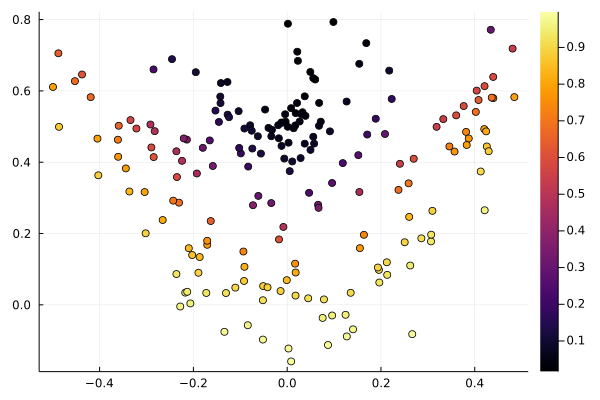

In [24]:
scatter(real[1,1:100],real[2,1:100],zcolor=m(real)')
scatter!(fake[1,1:100],fake[2,1:100],zcolor=m(fake)',legend=false)

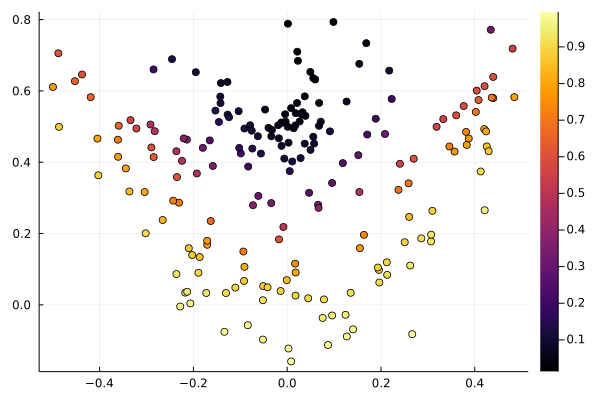

In [25]:
scatter(real[1,1:100],real[2,1:100],zcolor=m2(real)')
scatter!(fake[1,1:100],fake[2,1:100],zcolor=m2(fake)',legend=false)